**In this project we need to find the below objectives-**

1.	Visualize the stock prices using matplotlib
2.	Calculate and visualize the daily simple rate of return
3.	Calculate and visualize the mean rates of return 
4.	Calculate and visualize the variances of the returns
5.	Calculate and visualize the standard deviations of the returns
6.	Write a short thesis based on the correlations between the tech stocks
7.  How much value do we put at risk by investing in a particular stock
8.  Plotting the individual stocks


**Installing the required libraries**

In [1]:
!pip install yfinance
!pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

**Importing the required fields**

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import pandas_datareader as web
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

# Defining Stocks
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'META'] 
# Creating dates
start_date ='1990-01-01'
end_date ='2023-01-01'
#Retriving data
stock_data = yf.download(symbols, start_date, end_date)
# View data 
stock_data.tail(10)

[*********************100%***********************]  5 of 5 completed


Adj Close                                    \
                                 AAPL       AMZN       GOOG        META   
Date                                                                      
2022-12-16 00:00:00-05:00  134.509995  87.860001  90.860001  119.430000   
2022-12-19 00:00:00-05:00  132.369995  84.919998  89.150002  114.480003   
2022-12-20 00:00:00-05:00  132.300003  85.190002  89.629997  117.089996   
2022-12-21 00:00:00-05:00  135.449997  86.769997  90.250000  119.760002   
2022-12-22 00:00:00-05:00  132.229996  83.790001  88.260002  117.120003   
2022-12-23 00:00:00-05:00  131.860001  85.250000  89.809998  118.040001   
2022-12-27 00:00:00-05:00  130.029999  83.040001  87.930000  116.879997   
2022-12-28 00:00:00-05:00  126.040001  81.820000  86.459999  115.620003   
2022-12-29 00:00:00-05:00  129.610001  84.180000  88.949997  120.260002   
2022-12-30 00:00:00-05:00  129.929993  84.000000  88.730003  120.339996   

                                            Close                        \
                                 MSFT        AAPL       AMZN       GOOG   
Date                                                                      
2022-12-16 00:00:00-05:00  244.690002  134.509995  87.860001  90.860001   
2022-12-19 00:00:00-05:00  240.449997  132.369995  84.919998  89.150002   
2022-12-20 00:00:00-05:00  241.800003  132.300003  85.190002  89.629997   
2022-12-21 00:00:00-05:00  244.429993  135.449997  86.769997  90.250000   
2022-12-22 00:00:00-05:00  238.190002  132.229996  83.790001  88.260002   
2022-12-23 00:00:00-05:00  238.729996  131.860001  85.250000  89.809998   
2022-12-27 00:00:00-05:00  236.960007  130.029999  83.040001  87.930000   
2022-12-28 00:00:00-05:00  234.529999  126.040001  81.820000  86.459999   
2022-12-29 00:00:00-05:00  241.009995  129.610001  84.180000  88.949997   
2022-12-30 00:00:00-05:00  239.820007  129.929993  84.000000  88.730003   

                                                   ...        Open             \
                                 META        MSFT  ...        AAPL       AMZN   
Date                                               ...                          
2022-12-16 00:00:00-05:00  119.430000  244.690002  ...  136.690002  88.269997   
2022-12-19 00:00:00-05:00  114.480003  240.449997  ...  135.110001  87.510002   
2022-12-20 00:00:00-05:00  117.089996  241.800003  ...  131.389999  85.330002   
2022-12-21 00:00:00-05:00  119.760002  244.429993  ...  132.979996  86.180000   
2022-12-22 00:00:00-05:00  117.120003  238.190002  ...  134.350006  85.519997   
2022-12-23 00:00:00-05:00  118.040001  238.729996  ...  130.919998  83.250000   
2022-12-27 00:00:00-05:00  116.879997  236.960007  ...  131.380005  84.970001   
2022-12-28 00:00:00-05:00  115.620003  234.529999  ...  129.669998  82.800003   
2022-12-29 00:00:00-05:00  120.260002  241.009995  ...  127.989998  82.870003   
2022-12-30 00:00:00-05:00  120.339996  239.820007  ...  128.410004  83.120003   

                                                                 Volume  \
                                GOOG        META        MSFT       AAPL   
Date                                                                      
2022-12-16 00:00:00-05:00  91.199997  120.230003  248.550003  160156900   
2022-12-19 00:00:00-05:00  90.879997  116.830002  244.860001   79592600   
2022-12-20 00:00:00-05:00  88.730003  113.260002  239.399994   77432800   
2022-12-21 00:00:00-05:00  89.730003  116.699997  241.690002   85928000   
2022-12-22 00:00:00-05:00  88.930000  117.199997  241.259995   77852100   
2022-12-23 00:00:00-05:00  87.620003  116.029999  236.110001   63814900   
2022-12-27 00:00:00-05:00  89.309998  117.930000  238.699997   69007800   
2022-12-28 00:00:00-05:00  87.500000  116.250000  236.889999   85438400   
2022-12-29 00:00:00-05:00  87.029999  116.400002  235.649994   75703700   
2022-12-30 00:00:00-05:00  87.364998  118.160004  238.210007   76960600   

                                              

**1. Visualize the stock prices using matplotlib**

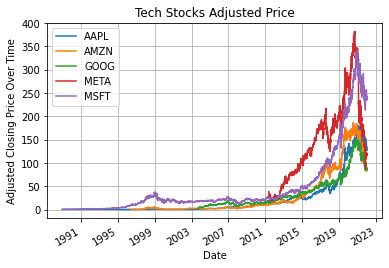

In [3]:
#  Set the x label to "Date". Set the y label to "Adjusted Closing Price Over Time". Set the graph title to "Tech Stocks Adjusted Price".
# 1. Data Visualization 
adj_date = stock_data["Adj Close"]
adj_date.plot()
plt.title("Tech Stocks Adjusted Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.grid()
plt.show()

# adj_date = stock_data["Open"]
# adj_date.plot()
# plt.title("Tech Stocks Adjusted Price")
# plt.xlabel("Date")
# plt.ylabel("Adjusted Closing Price Over Time")
# plt.grid()
# plt.show()

# adj_date = stock_data["Close"]
# adj_date.plot()
# plt.title("Tech Stocks Adjusted Price")
# plt.xlabel("Date")
# plt.ylabel("Adjusted Closing Price Over Time")
# plt.grid()
# plt.show()

# adj_date = stock_data["Volume"]
# adj_date.plot()
# plt.title("Tech Stocks Adjusted Price")
# plt.xlabel("Date")
# plt.ylabel("Adjusted Closing Price Over Time")
# plt.grid()
# plt.show()

**2. Calculate and visualize the daily simple rate of return**

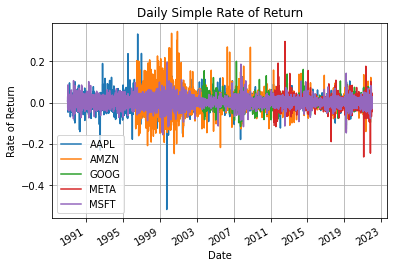

                               AAPL      AMZN      GOOG      META      MSFT
Date                                                                       
2022-12-23 00:00:00-05:00 -0.002798  0.017425  0.017562  0.007855  0.002267
2022-12-27 00:00:00-05:00 -0.013878 -0.025924 -0.020933 -0.009827 -0.007414
2022-12-28 00:00:00-05:00 -0.030685 -0.014692 -0.016718 -0.010780 -0.010255
2022-12-29 00:00:00-05:00  0.028324  0.028844  0.028799  0.040131  0.027630
2022-12-30 00:00:00-05:00  0.002469 -0.002138 -0.002473  0.000665 -0.004938


In [4]:
# 2. Calculate and visualize the daily simple rate of return over time.

daily_return = adj_date.pct_change()
daily_return.plot()
plt.title("Daily Simple Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.grid()
plt.show()
print(daily_return.tail())


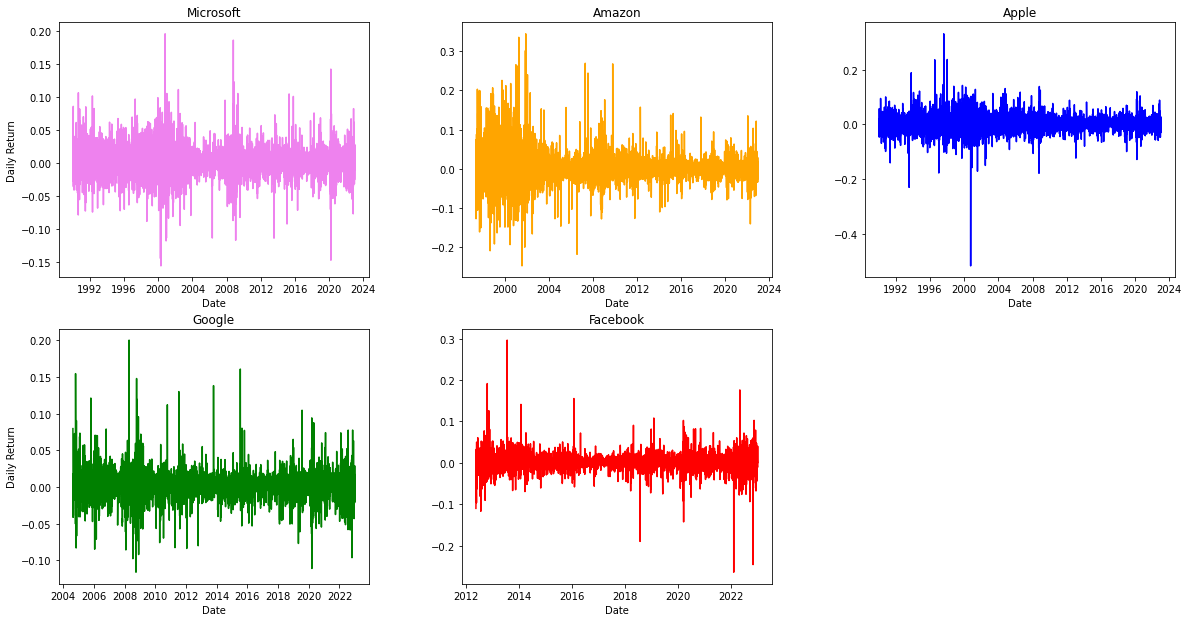

In [5]:
# Create subplots of daily simple rate of return.
# In order to better visualize the daily returns, create a subplot for each tech stock.

fig = plt.figure(figsize=(20, 10))
#Microsoft
ax1 = plt.subplot(2, 3, 1)
plt.plot(daily_return['MSFT'], color='violet')
plt.title('Microsoft')
plt.xlabel('Date')
plt.ylabel('Daily Return')
#Amazon
ax2 = plt.subplot(2, 3, 2)
plt.plot(daily_return['AMZN'], color='orange')
plt.title('Amazon')
plt.xlabel('Date')
#Apple
ax3 = plt.subplot(2, 3, 3)
plt.plot(daily_return['AAPL'], color='blue')
plt.title('Apple')
plt.xlabel('Date')
#Google
ax4 = plt.subplot(2, 3, 4)
plt.plot(daily_return['GOOG'], color='green')
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Daily Return')
#Facebook
ax5 = plt.subplot(2, 3, 5)
plt.plot(daily_return['META'], color='red')
plt.title('Facebook')
plt.xlabel('Date')
plt.subplots_adjust(wspace=0.3, bottom=0.1)
plt.show()

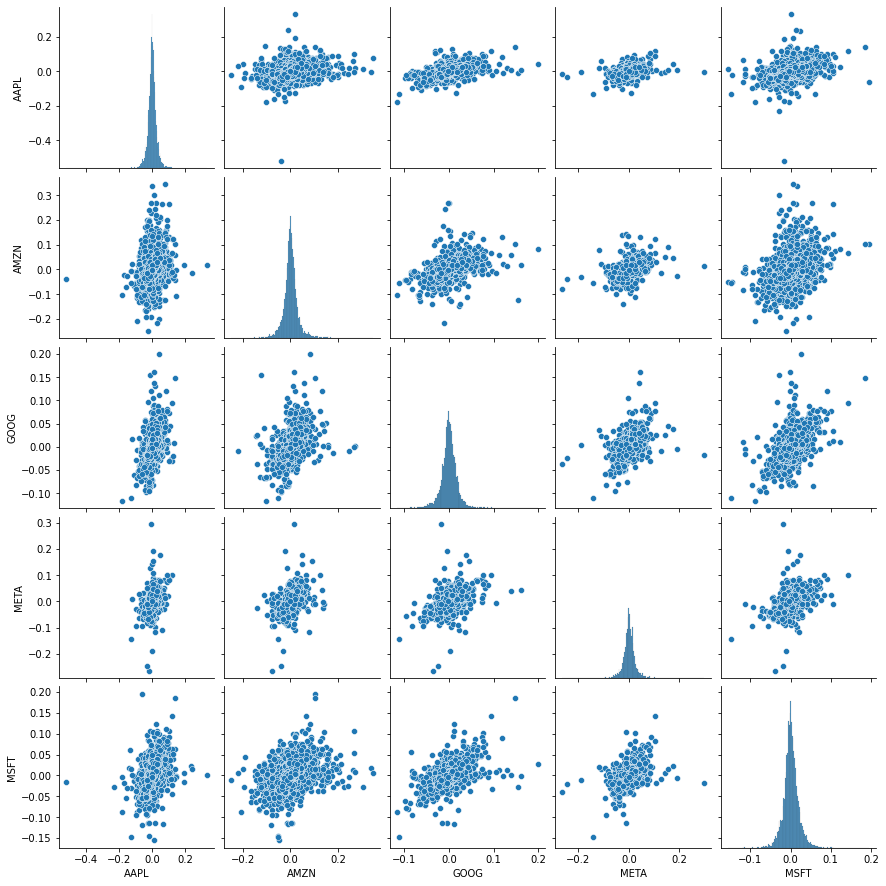

In [6]:
# sns pairplot
sns.pairplot(data= daily_return[1:])

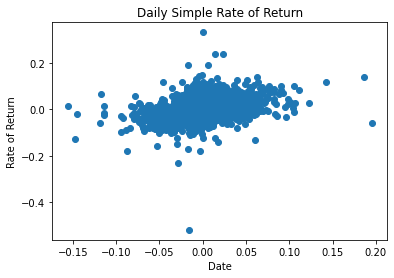

In [7]:
#scatter Plot
fig, ax= plt.subplots()

ax.scatter(daily_return['MSFT'],daily_return['AAPL'])
#set titles and labels
ax.set_title('Daily Simple Rate of Return')
ax.set_xlabel('Date')
ax.set_ylabel('Rate of Return')

plt.show()

**3. Calculate and visualize the mean rates of return**

AAPL    0.001127
AMZN    0.001690
GOOG    0.000958
META    0.000751
MSFT    0.000976
dtype: float64


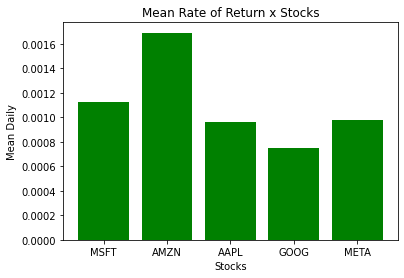

In [8]:
# 3. Calculate and visualize the mean of each tech stock's daily simple rate of return
mean_daily_return = daily_return.mean()
print(mean_daily_return)

#Plotting bar chart
ax7 = plt.subplot()
ax7.set_xticks(range(len(symbols)))
ax7.set_xticklabels(symbols)
plt.bar(range(len(symbols)), mean_daily_return, color = 'green')
plt.xlabel('Stocks')
plt.ylabel('Mean Daily')
plt.title('Mean Rate of Return x Stocks')
plt.show()


Here we learnt that **Amazon** has high daily mean returns and **Google** has the lowest daily mean returns and the graph is not homogenous.

**4. Calculate and visualize the variances of the returns**

AAPL    0.000748
AMZN    0.001310
GOOG    0.000375
META    0.000639
MSFT    0.000404
dtype: float64


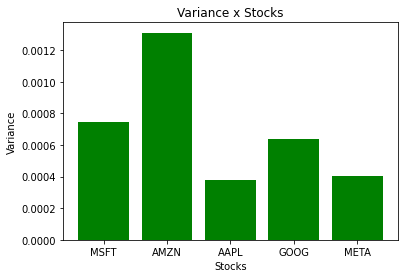

In [9]:
# 4. Calculate and visualize the variance.
variance_daily_return = daily_return.var()
print(variance_daily_return)
#Plotting bar chart
ax8 = plt.subplot()
ax8.set_xticks(range(len(symbols)))
ax8.set_xticklabels(symbols)
plt.bar(range(len(symbols)), variance_daily_return, color = 'green')
plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Variance x Stocks')
plt.show()

From the above graph we understood that **Amazon** has high Variance and **Apple** has the lowest variance and the graph is not homogenous.





**5. Calculate and visualize the standard deviations of the returns**

AAPL    0.027352
AMZN    0.036192
GOOG    0.019373
META    0.025274
MSFT    0.020108
dtype: float64


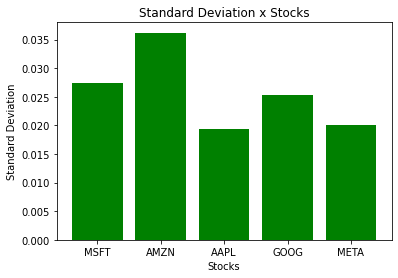

In [10]:
# 5. Calculate and visualize the standard deviation
sd_daily_return = daily_return.std()
print(sd_daily_return)
#Plotting bar chart
ax9 = plt.subplot()
ax9.set_xticks(range(len(symbols)))
ax9.set_xticklabels(symbols)
plt.bar(range(len(symbols)), sd_daily_return, color = 'green')
plt.xlabel('Stocks')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation x Stocks')
plt.show()

Here, **Amazon** has high deviation and **Apple** has the lowest deviation and the graph is homogenous.

**6.	Write a short thesis based on the correlations between the tech stocks**

In [11]:
# 6. Calculate the correlations
correlation= daily_return.corr()
print(correlation)

          AAPL      AMZN      GOOG      META      MSFT
AAPL  1.000000  0.322412  0.520758  0.434558  0.407812
AMZN  0.322412  1.000000  0.509218  0.491784  0.405858
GOOG  0.520758  0.509218  1.000000  0.540549  0.564533
META  0.434558  0.491784  0.540549  1.000000  0.462011
MSFT  0.407812  0.405858  0.564533  0.462011  1.000000


Text(0.5, 1.0, 'Correlation of stock closing price')

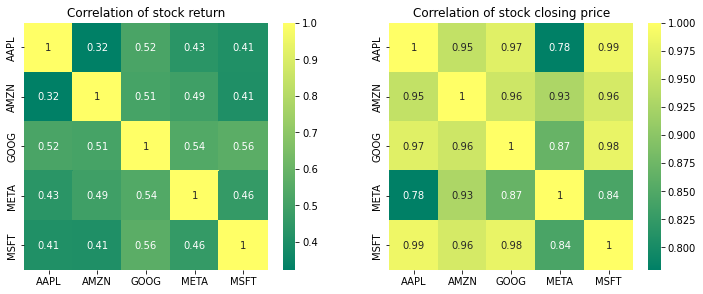

In [12]:
# Plotting the correlations
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(daily_return.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(adj_date.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Thesis

**Correlation** is a statistic that measures how far two variables move in relation to each other and must have a value between **-1.0 and +1.0**. Correlation measures association but does not reveal whether x causes y or vice versa or whether the association is due to a third factor.


We learned from the previous graph that two variables have a positive correlation when their values rise and fall together. According to both figures' diagonal yellow lines, "1" represents the ideal positive correlation.

 **Degree of Correlation-** 

  i. A **strong or high correlation** is stated to exist if the coefficient value is between **0.50 and 1**.

  ii. A **medium correlation/moderate correlation** is defined as a correlation value between **0.30 and 0.49**.

  iii. When the value lies below **+ 0.29**, then it is said to be a **small/low correlation**.

  iv. If the value is near **± 1**, then it said to be a **perfect correlation**.

  v. When the value is **zero** then there is  **no correlation**.

 vi. Here from the graph correlation of stock return there is a **moderate corrlelation between META and MSFT** of **0.46**

  vii.  There is **high correlation** between **GOOG and META** of **0.56**










**How much value do we put at risk by investing in a particular stock?**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

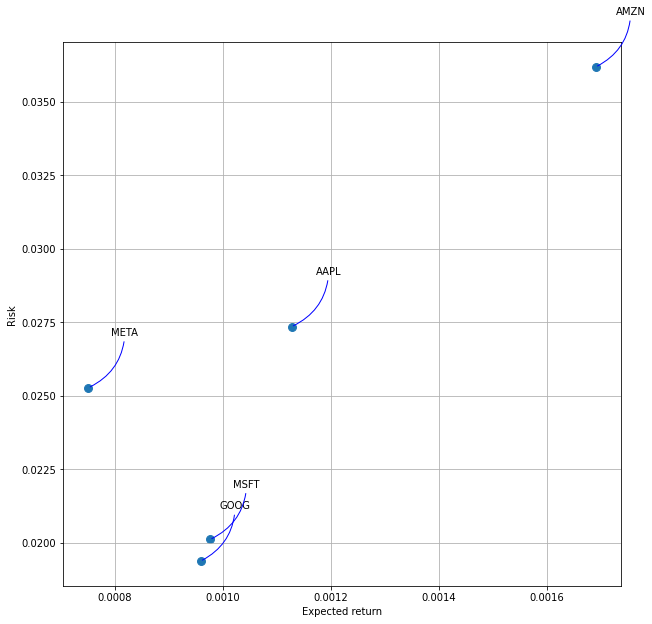

In [13]:
# How much value do we put at risk by investing in a particular stock?
rets = daily_return.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 10))
plt.scatter(daily_return.mean(), daily_return.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.grid()

for label, x, y in zip(rets.columns, daily_return.mean(), daily_return.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
#plt.grid()    

From the above graph we came to know that we can invest in all the companies according to the risk and expected returns as-

1. **Amazon** has high returns as well as high risk so if you are a risk taker you can invest into it but according to our analysis Amazon is good for long term investment with proper risk management.

2. **Apple** has moderate risk and moderate expected return so it is good for long term as well as short term investment.

3. **Meta** has high risk and low expected return so it is not good for investment though if you want to take risk you can invest in it.

4. **Microsoft** and **Google** has low risk and high expected returns so it is good for long term investment.



**8.  Plotting the individual stocks**

In [ ]:
# Using plotly.express for individual plotting of apple
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="AAPL")
fig.show()

In [15]:
# Using plotly.express for individual plotting of google
df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

In [16]:
# Using plotly.express for individual plotting of amazon
df = px.data.stocks()
fig = px.line(df, x='date', y="AMZN")
fig.show()

In [17]:
# Using plotly.express for individual plotting of microsoft
df = px.data.stocks()
fig = px.line(df, x='date', y="MSFT")
fig.show()

In [18]:
# Using plotly.express for individual plotting of meta
df = px.data.stocks()
fig = px.line(df, x='date', y="FB")
fig.show()